<a href="https://colab.research.google.com/github/dennisorellana2/Capstone_Project/blob/main/Data_670_Capstone_Project_Part_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Dennis Orellana
## Data 670 Capstone Project Part 3

## Purpose: This is part 3 of my Capstone Project. This section is comparing machine learning models for the "job_posting_final.csv".


In [2]:
# Install the lazypredict library 
!pip install lazypredict

     |████████████████████████████████| 256kB 2.2MB/s 
     |████████████████████████████████| 307kB 1.6MB/s 
     |████████████████████████████████| 1.2MB 1.6MB/s 
     |████████████████████████████████| 14.5MB 5.2MB/s 
     |████████████████████████████████| 6.8MB 7.1MB/s 
     |████████████████████████████████| 10.1MB 10.4MB/s 
     |████████████████████████████████| 276kB 11.9MB/s 
     |████████████████████████████████| 81kB 6.7MB/s 
     |████████████████████████████████| 127.6MB 43kB/s 
     |████████████████████████████████| 25.9MB 1.2MB/s 
  Created wheel for PyYAML: filename=PyYAML-5.3.1-cp37-cp37m-linux_x86_64.whl size=44620 sha256=05b9ae010e0d35a9a5ceaa105764e179bd29e00779e89584d5429d19d8d97d98
  Stored in directory: /root/.cache/pip/wheels/a7/c1/ea/cf5bd31012e735dc1dfea3131a2d5eae7978b251083d6247bd
Successfully built PyYAML
ERROR: tensorflow 2.4.1 has requirement numpy~=1.19.2, but you'll have numpy 1.19.1 which is incompatible.
ERROR: google-colab 1.0.0 has requirement pa

In [1]:
# Import Libraries
import pandas as pd 
import numpy as np 
import seaborn as sb
import matplotlib.pyplot as plt
import lazypredict


from lazypredict.Supervised import LazyClassifier
from sklearn.model_selection import train_test_split

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:143: FutureWarning: The sklearn.utils.testing module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.utils. Anything that cannot be imported from sklearn.utils is now part of the private API.
  warnings.warn(message, FutureWarning)


In [2]:
# upload the csv file from local directory
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving job_posting_final.csv to job_posting_final.csv
User uploaded file "job_posting_final.csv" with length 2331010 bytes


In [3]:
# load the dataset from working directory 

job_posting_final = pd.read_csv('job_posting_final.csv')

## Split dataset into training and test

In [4]:
# set the X and y varaibles for Implementation of Logistic Regression
x = job_posting_final[['job_title', 'job_description', 'location', 'city', 'state', 'zip_code',
       'apply_url', 'company_name', 'companydescription', 'uniq_id',
       'crawl_timestamp', 'job_board', 'job_id', 'department', 'requirements',
       'benefits', 'telecommuting', 'has_company_logo', 'has_questions',
       'function', 'fraudulent', 'job_type', 'Full Time', 'I.T']].values

y = job_posting_final[['fraudulent']].values

In [5]:
# set the X and Y varaibles 
X = job_posting_final[['job_title', 'job_description', 'location', 'city', 'state', 'zip_code',
       'apply_url', 'company_name', 'companydescription', 'uniq_id',
       'crawl_timestamp', 'job_board', 'job_id', 'department', 'requirements',
       'benefits', 'telecommuting', 'has_company_logo', 'has_questions',
       'function', 'fraudulent', 'job_type', 'Full Time', 'I.T']].values

Y = job_posting_final[['fraudulent']].values

In [6]:
# Data split
from sklearn.model_selection  import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(
         X, y, test_size=0.2, random_state=0)

In [7]:
# Standardizing the features:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

In [8]:
# Data split shape
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((27222, 24), (6806, 24), (27222, 1), (6806, 1))

## Predictive Models##

In [ ]:
# Builds the lazyclassifier
clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None)
models,predictions = clf.fit(X_train, X_test, Y_train, Y_test)

100%|██████████| 29/29 [02:17<00:00,  4.74s/it]


### Prints the model performance

In [ ]:
# print the models
models

,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
AdaBoostClassifier,1.00,1.00,1.00,1.00,0.07
LinearDiscriminantAnalysis,1.00,1.00,1.00,1.00,0.18
XGBClassifier,1.00,1.00,1.00,1.00,0.56
SVC,1.00,1.00,1.00,1.00,1.02
SGDClassifier,1.00,1.00,1.00,1.00,0.09
RidgeClassifierCV,1.00,1.00,1.00,1.00,0.11
RidgeClassifier,1.00,1.00,1.00,1.00,0.07
RandomForestClassifier,1.00,1.00,1.00,1.00,1.21
Perceptron,1.00,1.00,1.00,1.00,0.09


### Choosing three different classification algorithms from the list above which are

### Logistic Regression
### K Nearest Neighbors
###  Random Forest

# Logistic Regression

In [9]:
# Training Model
from sklearn.linear_model import LogisticRegression
LgR = LogisticRegression(solver='liblinear')
LgR.fit(X_train, Y_train)


LogisticRegression(solver='liblinear')

In [10]:
# Testing Model 
Y_pred = LgR.predict(X_test)
Y_test = Y_test.flatten()
Y_pred = Y_pred.flatten()
Y_test.shape, Y_pred.shape

((6806,), (6806,))

In [11]:
# Accuracy Score
from sklearn.metrics import accuracy_score
accuracy_score(Y_pred, Y_test)

1.0

#### Find the Implementation of Logistic Regression

In [12]:
# Add a bias column to the X
X = np.c_[np.ones((x.shape[0], 1)), x]
X[:5]

array([[1.0000e+00, 4.2980e+03, 1.0000e+00, 2.5350e+03, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 4.0520e+03, 8.0000e+01,
        1.0420e+03, 2.6000e+03, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        1.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00],
       [1.0000e+00, 1.4580e+03, 1.8000e+01, 1.2490e+03, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 1.7607e+04, 1.0540e+03,
        9.8930e+03, 4.0800e+03, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        1.8000e+01, 1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00],
       [1.0000e+00, 2.9420e+03, 0.0000e+00, 6.0000e+02, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 1.7709e+04, 1.0540e+03,
        1.1527e+04, 3.9860e+03, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 1.0000e+00, 0.0000e+00, 0.

In [13]:
# make y to match with the dimensions
y = y[:, np.newaxis]
y[:5]

array([[[1]],

       [[1]],

       [[1]],

       [[1]],

       [[1]]])

In [14]:
# Create sigmoid function
def sigmoid(x, theta):
    z= np.dot(x, theta)
    return 1/(1+np.exp(-z))

In [15]:
# Create hypothesis function with the sigmoid
def hypothesis(theta, x):
    return sigmoid(x, theta)

In [16]:
# Create cost function using the formula
def cost_function(theta, x, y):
    m = X.shape[0]
    h = hypothesis(theta, x)
    return -(1/m)*np.sum(y*np.log(h) + (1-y)*np.log(1-h))

In [17]:
# Create the gradient descent function 
def gradient(theta, x, y):
    m = X.shape[0]
    h = hypothesis(theta, x)
    return (1/m) * np.dot(X.T, (h-y))

In [18]:
# Import the  optimization function
theta = np.zeros((X.shape[1], 1))
from scipy.optimize import minimize,fmin_tnc
def fit(x, y, theta):
    opt_weights = fmin_tnc(func=cost_function, x0=theta, fprime=gradient, args=(x, y.flatten()))
    return opt_weights[0]
parameters = fit(X, y, theta)

In [19]:
# calculate the final hypothesis
h = hypothesis(parameters, X)

In [20]:
# hypothesis outputs
def predict(h):
    h1 = []
    for i in h:
        if i>=0.5:
            h1.append(1)
        else:
            h1.append(0)
    return h1
y_pred = predict(h)

In [21]:
# Accuracy
accuracy = 0
for i in range(0, len(y_pred)):
    if y_pred[i] == y[i]:
        accuracy += 1
accuracy/len(y)

1.0

In [22]:
# Evaluation Logistic Regression
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, log_loss
cm = confusion_matrix(Y_test, Y_pred)
acc = accuracy_score(Y_test, Y_pred)
F1 = f1_score(Y_test, Y_pred, average="micro") 

print(cm)
print(acc)
print(F1)

[[3441    0]
 [   0 3365]]
1.0
1.0


In [23]:
# classification report
from sklearn.metrics import classification_report
print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3441
           1       1.00      1.00      1.00      3365

    accuracy                           1.00      6806
   macro avg       1.00      1.00      1.00      6806
weighted avg       1.00      1.00      1.00      6806



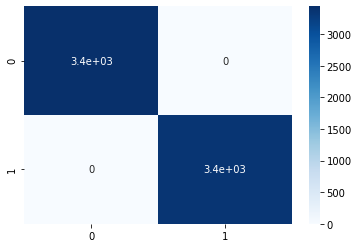

In [24]:
# Plot Confusion Matrix with Heatmap 

sb.heatmap(cm, annot=True, cmap='Blues')

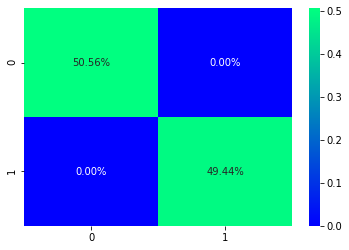

In [25]:
# Plot Percentage Confusion Matrix with Heatmap
sb.heatmap(cm/np.sum(cm), annot=True, 
            fmt='.2%', cmap='winter')

# K Nearest Neighbors

In [26]:
# Training Model
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train,Y_train)

KNeighborsClassifier()

In [27]:
# Testing Model 
Y_pred = knn.predict(X_test)

In [28]:
# Accuracy Score
accuracy_score(Y_pred,Y_test)

0.959594475462827

In [29]:
from sklearn.model_selection import cross_val_score
# search for an optimal value of K for KNN
k_range = list(range(1, 10))

k_scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X, Y, cv=10, scoring='accuracy')
    k_scores.append(scores.mean())
print(k_scores)

[0.9300842894959196, 0.9300842894959196, 0.9014901348414261, 0.9014901348414261, 0.8802138480363576, 0.8802138480363576, 0.8603776399528513, 0.8603776399528513, 0.844126676620881]


Text(0, 0.5, 'Cross-Validated Accuracy')

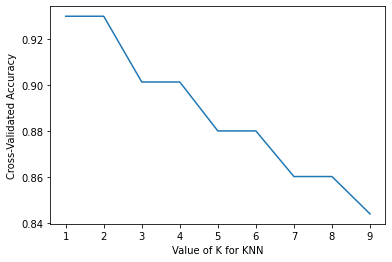

In [30]:
# plot the value of K for KNN (x-axis) versus the cross-validated accuracy (y-axis)
plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')

The optimal value of K for KNN is 2.

In [31]:
# Evaluation K Nearest Neighbors
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, log_loss
cm = confusion_matrix(Y_test, Y_pred)
acc = accuracy_score(Y_test, Y_pred)
F1 = f1_score(Y_test, Y_pred, average="micro") 

print(cm)
print(acc)
print(F1)

[[3166  275]
 [   0 3365]]
0.959594475462827
0.959594475462827


In [32]:
# classification report
from sklearn.metrics import classification_report
print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       1.00      0.92      0.96      3441
           1       0.92      1.00      0.96      3365

    accuracy                           0.96      6806
   macro avg       0.96      0.96      0.96      6806
weighted avg       0.96      0.96      0.96      6806



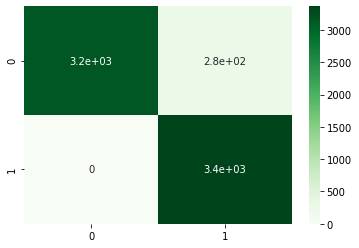

In [33]:
# Plot Confusion Matrix with Heatmap 

sb.heatmap(cm, annot=True, cmap='Greens')

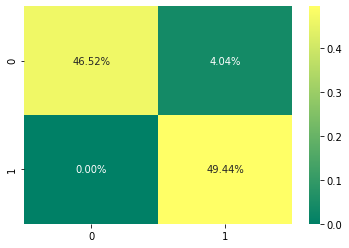

In [34]:
# Plot Percentage Confusion Matrix with Heatmap
sb.heatmap(cm/np.sum(cm), annot=True, 
            fmt='.2%', cmap='summer')

# Random Forest 

In [35]:
# Training Model
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(max_features=5,n_estimators=10)
rfc.fit(X_train, Y_train)

RandomForestClassifier(max_features=5, n_estimators=10)

In [36]:
# Testing Model 
Y_pred = rfc.predict(X_test)
Y_test = Y_test.flatten()
Y_pred = Y_pred.flatten()

In [37]:
# Accuracy Score
accuracy_score(Y_pred,Y_test)

1.0

In [39]:
# Evaluation Random Forest 
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, log_loss
cm = confusion_matrix(Y_test, Y_pred)
acc = accuracy_score(Y_test, Y_pred)
F1 = f1_score(Y_test, Y_pred, average="micro") 

print(cm)
print(acc)
print(F1)

[[3441    0]
 [   0 3365]]
1.0
1.0


In [40]:
# classification report
from sklearn.metrics import classification_report
print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3441
           1       1.00      1.00      1.00      3365

    accuracy                           1.00      6806
   macro avg       1.00      1.00      1.00      6806
weighted avg       1.00      1.00      1.00      6806



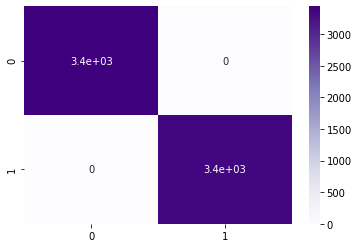

In [41]:
# Plot Confusion Matrix with Heatmap 

sb.heatmap(cm, annot=True, cmap='Purples')

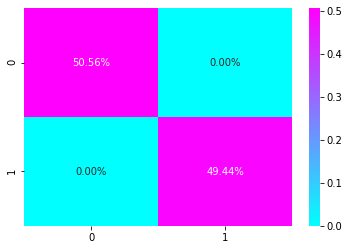

In [42]:
# Plot Percentage Confusion Matrix with Heatmap
sb.heatmap(cm/np.sum(cm), annot=True, 
            fmt='.2%', cmap='cool')

## 10-Fold K-Fold Cross Validation

In [43]:
# Logistic regression model performance using cross_val_score
Log_score = cross_val_score(LogisticRegression(solver='liblinear'), X, Y,cv=10)
print(Log_score)

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [44]:
# Average logistic regression cross_val_score
Log_score.mean()

1.0

In [45]:
# K Nearest Neighbors model performance using cross_val_score
knn_score = cross_val_score(KNeighborsClassifier(n_neighbors=2), X, Y,cv=10)
print(knn_score)

[0.89568028 0.93917132 0.93593888 0.90596532 0.93476344 0.97560976
 0.95885983 0.98648252 0.98941799 0.77895356]


In [46]:
# Average K Nearest Neighbors cross_val_score
knn_score.mean()

0.9300842894959196

In [47]:
# Random Forest model performance using cross_val_score
rf_score = cross_val_score(RandomForestClassifier(n_estimators=10),X, Y,cv=10)
print(rf_score)

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [48]:
# Average Random Forest cross_val_score
rf_score.mean()

1.0

## Computing AUROC and ROC curve values

In [49]:
# import AUROC and ROC curve
from sklearn.metrics import roc_curve, roc_auc_score

In [50]:
# Prediction probabilities
r_probs = [0 for _ in range(len(Y_test))]

lr_probs = LgR.predict_proba(X_test)
rf_probs = rfc.predict_proba(X_test)

lr_probs = lr_probs[:, 1]
rf_probs = rf_probs[:, 1]

In [51]:
# Calculate AUROC
r_auc = roc_auc_score(Y_test, r_probs)
lr_auc = roc_auc_score(Y_test, lr_probs)
rf_auc = roc_auc_score(Y_test, rf_probs)


In [52]:
# Print AUROC scores
print('Random (chance) Prediction: AUROC = %.3f' % (r_auc))
print('Random Forest: AUROC = %.3f' % (rf_auc))
print('Logistic Regression: AUROC = %.3f' % (lr_auc))

Random (chance) Prediction: AUROC = 0.500
Random Forest: AUROC = 1.000
Logistic Regression: AUROC = 1.000


In [53]:
# Calculate ROC curve

r_fpr, r_tpr, _ = roc_curve(Y_test, r_probs)
rf_fpr, rf_tpr, _ = roc_curve(Y_test, rf_probs)
lr_fpr, lr_tpr, _ = roc_curve(Y_test, lr_probs)


##Plot the ROC curve

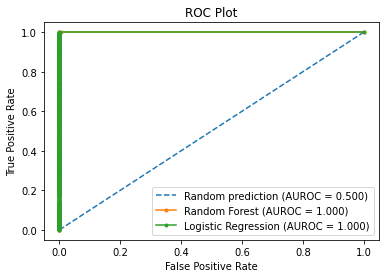

In [54]:
# Plot ROC Curve
plt.plot(r_fpr, r_tpr, linestyle='--', label='Random prediction (AUROC = %0.3f)' % r_auc)
plt.plot(rf_fpr, rf_tpr, marker='.', label='Random Forest (AUROC = %0.3f)' % rf_auc)
plt.plot(lr_fpr, lr_tpr, marker='.', label='Logistic Regression (AUROC = %0.3f)' % lr_auc)

# Title
plt.title('ROC Plot')
# Axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# Show legend
plt.legend() # 
# Show plot
plt.show()

The best overall models are Logistic Regression and Random Forest.  

#Resources

•	https://github.com/codebasics/py/blob/master/ML/12_KFold_Cross_Validation/12_k_fold.ipynb

•	https://github.com/justmarkham/scikit-learn-videos/blob/master/07_cross_validation.ipynb

•	https://www.kaggle.com/shivanirana63/fake-job-prediction-ensemble-modeling

•	https://github.com/Suji04/Contraceptive-Method-prediction/blob/master/classifier.py

•	https://github.com/dataprofessor/code/blob/master/python/ROC_curve.ipynb

•	https://regenerativetoday.com/logistic-regression-with-python-using-an-optimization-function/

